Analysis of pokemon with given data set that includes(pokemon stats, and results from numberous battles)

Questions to seek answers for:
1. Which starter pokemon has the most number of wins?
2. What are the top 10 best average pokemon according to stats?
3. What are the top 10 best average pokemon according to battle data?
4. Why are the top 10 the top 10? (hp, attack, speed, defense, legendary, type)

In [1]:
#import libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#full data frame
battle = pd.read_csv('pkmn_combat.csv')


#pokemon stat dataframe
poke = pd.read_csv('pokemon.csv')

#remove unwanted columns
cols = list(poke.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('name')) #Remove name from list, and place back in
cols.pop(cols.index('pokedex_number')) #Remove name from list, and place back in
cols.pop(cols.index('base_egg_steps'))
cols.pop(cols.index('base_happiness'))
cols.pop(cols.index('height_m'))
cols.pop(cols.index('japanese_name'))
cols.pop(cols.index('percentage_male'))
cols.pop(cols.index('experience_growth'))
cols.pop(cols.index('type1'))#Remove name from list, and place back in
cols.pop(cols.index('type2'))#Remove name from list, and place back in
cols.pop(cols.index('classfication'))
cols.pop(cols.index('capture_rate'))
cols.pop(cols.index('generation'))#Remove name from list, and place back in
cols.pop(cols.index('base_total'))#Remove name from list, and place back in

#Create new dataframe with name and pokedex number to the left
poke = poke[['pokedex_number', 'name', 'base_total', 'type1', 'type2', 'generation']+cols] 
poke.head(5)

pokedex_number        name  base_total  type1   type2  generation  \
0               1   Bulbasaur         318  grass  poison           1   
1               2     Ivysaur         405  grass  poison           1   
2               3    Venusaur         625  grass  poison           1   
3               4  Charmander         309   fire     NaN           1   
4               5  Charmeleon         405   fire     NaN           1   

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   ...  against_steel  against_water  attack  defense  hp  sp_attack  \
0  ...            1.0            0.5      49       49  45         65   
1  ...            1.0            0.5      62       63  60         80   
2  ...            1.0            0.5     100      123  80        122   
3  ...            0.5            2.0      52       43  39         60   
4  ...            0.5            2.0      64       58  58         80   

   sp_defense  speed  weight_kg  is_legendary  
0          65     45        6.9             0  
1          80     60       13.0             0  
2         120     80      100.0             0  
3          50     65        8.5             0  
4          65     80       19.0             0  

[5 rows x 33 columns]

# Answering question 1: Which starter has the most wins?

In [2]:
starter_array = [1, 4, 7]

#make df for just charizard, bulbasuar, and squirtle
starter_battles_df = battle[battle.Winner.isin(starter_array)]
starter_battles_df.sort_values(by = 'Winner')


#count number of battles participated in
bulb_battles = len((battle.loc[battle['First_pokemon'] == 1]) + (battle.loc[battle['Second_pokemon'] == 1]))
char_battles = len((battle.loc[battle['First_pokemon'] == 4]) + (battle.loc[battle['Second_pokemon'] == 4]))
sq_battles = len((battle.loc[battle['First_pokemon'] == 1]) + (battle.loc[battle['Second_pokemon'] == 7]))

#count number of battles won for each starter
bulb_wins = len(battle.loc[battle['Winner'] == 1])
char_wins = len(battle.loc[battle['Winner'] == 4])
sq_wins = len(battle.loc[battle['Winner'] == 7])

#calculate percent wins
percent_bulb_wins = int(bulb_wins/bulb_battles * 100)
percent_char_wins = int(char_wins/char_battles * 100)
percent_sq_wins = int(sq_wins/sq_battles * 100)

#print results
print('Bulbasaur won ' + str(percent_bulb_wins) + '% of the time')
print('Charmander won ' + str(percent_char_wins) + '% of the time')
print('Squirtle won ' + str(percent_sq_wins) + '% of the time')


Bulbasaur won 27% of the time
Charmander won 56% of the time
Squirtle won 80% of the time


In [10]:
battle

First_pokemon  Second_pokemon  Winner  HP_diff  Atk_diff  Def_diff  \
0                266             298     298      -20        -6        10   
1                702             701     701        0       -39       -18   
2                191             668     668      -20       -35        10   
3                237             683     683      -37       -80       -50   
4                151             231     151       50        50      -105   
...              ...             ...     ...      ...       ...       ...   
49995            707             126     707       70        80        30   
49996            589             664     589       25        30         0   
49997            303             368     368      -13       -65        40   
49998            109              89     109       15        -5       -20   
49999              9              73       9        8        24        28   

       SpAtk_diff  SpDef_diff  Spd_diff  1_2_Atk_Def  ...  Dmg_hp_1  Dmg_hp_2  \
0             -15          10       -19           24  ...  0.022857  0.112000   
1              18          39         0            0  ...  0.021978  0.019689   
2             -45          10         0          -35  ...  0.011228  0.021645   
3              10         -50       -28          -50  ...  0.005051  0.075000   
4             105        -160        50         -170  ...  0.100000  0.002041   
...           ...         ...       ...          ...  ...       ...       ...   
49995          80          95        30           50  ...  0.200000  0.005833   
49996         -15           5         8           45  ...  0.121429  0.000000   
49997          25          10       -25          -10  ...  0.019406  0.019167   
49998         -40           0        55          -40  ...  0.020000  0.021591   
49999         124          80        65           54  ...  0.129796  0.006575   

       Pkmn_1_type_1  Pkmn_1_type_2  Pkmn_2_type_1  Pkmn_2_type_2  Lgnd_1  \
0               Rock         Ground          Grass           Dark       0   
1              Grass       Fighting           Rock       Fighting       1   
2              Fairy         Flying        Psychic            NaN       0   
3               Fire            NaN         Dragon            NaN       0   
4               Rock          Water            Bug           Rock       0   
...              ...            ...            ...            ...     ...   
49995         Dragon           Fire          Water            NaN       1   
49996         Ground            NaN       Electric            NaN       0   
49997          Water         Flying         Normal            NaN       0   
49998       Electric            NaN       Electric          Steel       0   
49999           Fire         Flying       Fighting            NaN       0   

       Lgnd_2  Prio  Pkmn_1_win  
0           0     1           0  
1           1     0           0  
2           0     0           0  
3           0     1           0  
4           0     0           1  
...       ...   ...         ...  
49995       0     0           1  
49996       0     0           1  
49997       0     1           0  
49998       0     0           1  
49999       0     0           1  

[50000 rows x 35 columns]

## Squirtle won the most, let's find out why

In [3]:
#starters = poke.loc[poke['pokedex_number'].isin(starter_array)]
index = ['Bulbasaur', 'Charmander', 'Squirtle']

#find each attack and display
features = ['name', 'base_total', 'hp', 'attack', 'defense', 'speed']
plot_df = poke[features]
plot_df = plot_df[plot_df.name.isin(index)]
plot_df = plot_df.set_index('name')

#display the stats of each starter to look for patterns (appears that squirtle has a significantly higher defense)

# Display nicely

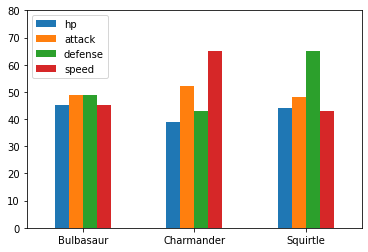

In [4]:
#try displaying the above data frame in a bar chart format
#features and starter_array

x_variables = ['hp', 'attack', 'defense', 'speed']
names = ['Bulbasaur', 'Charmander', 'Squirtle']

#get a list of stats for base total in a list  #should have 3 values 
hp = plot_df['hp']
attack = plot_df['attack']
defense = plot_df['defense']
speed = plot_df['speed']

plot_df = pd.DataFrame({ 
                       'hp': hp,
                       'attack': attack,
                       'defense': defense,
                       'speed': speed}, index = names)
graph = plot_df.plot.bar(rot = 0, ylim = (0,80))

## Analyze more of the top 10 pokemon based on win rate percentage